## Lab 6 - Model comparison 

### Excercise 1 - generate data

In [1]:
# F - number of letters in first name
#L - number of letters in last name

F = len("Maria")
L = len("Mazur")
N = (L+F)*100 #1000


In [2]:
from cmdstanpy import CmdStanModel
import arviz as az
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


##### 1. Compile code_1.stan and code_2.stan and generate data

In [3]:
model_1=CmdStanModel(stan_file='code_1.stan')
sim_1 = model_1.sample(data={"N": N})
sim_1 = sim_1.draws_pd()


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |██▋       | 00:00 Iteration: 400 / 1000 [ 40%]  (Sampling)


chain 1 |████      | 00:00 Iteration: 700 / 1000 [ 70%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                      
chain 2 |██████████| 00:00 Sampling completed                      

chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [4]:
model_2=CmdStanModel(stan_file='code_2.stan')
sim_2 = model_2.sample(data={"N": N})
sim_2 = sim_2.draws_pd()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▉         | 00:00 Iteration:   1 / 1000 [  0%]  (Sampling)



chain 1 |█▊        | 00:00 Iteration: 200 / 1000 [ 20%]  (Sampling)
chain 1 |██▎       | 00:00 Iteration: 300 / 1000 [ 30%]  (Sampling)




chain 1 |██▋       | 00:00 Iteration: 400 / 1000 [ 40%]  (Sampling)


chain 1 |███▏      | 00:01 Iteration: 500 / 1000 [ 50%]  (Sampling)


chain 1 |███▋      | 00:01 Iteration: 600 / 1000 [ 60%]  (Sampling)


chain 1 |████      | 00:01 Iteration: 700 / 1000 [ 70%]  (Sampling)


chain 1 |████▌     | 00:01 Iteration: 800 / 1000 [ 80%]  (Sampling)


chain 1 |██████████| 00:01 Sampling completed                      
chain 2 |██████████| 00:01 Sampling completed                      

chain 3 |██████████| 00:01 Sampling completed
chain 4 |██████████| 00:01 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [5]:
y_array_1 = np.array([sim_1[f"y[{i+1}]"] for i in range(1000)])
y_array_2 = np.array([sim_2[f"y[{i+1}]"] for i in range(1000)])

### Excercise 2 - compare normal and student models for data from first file 

In [12]:
# model 3 for data 1
model_3 =CmdStanModel(stan_file='code_3.stan')
sim_3_1_ = model_3.sample(data={"N": N, "y": y_array_1[:,0]})
sim_3_1 = sim_3_1_.draws_pd()

INFO:cmdstanpy:compiling stan file /home/lab6/code_3.stan to exe file /home/lab6/code_3
INFO:cmdstanpy:compiled model executable: /home/lab6/code_3
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)

chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [13]:
# model 4 for data 1
model_4 =CmdStanModel(stan_file='code_4.stan')
sim_4_1_ = model_4.sample(data={"N": N, "y": y_array_1[:,0]})
sim_4_1 = sim_4_1_.draws_pd()


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |████████▏ | 00:00 Iteration: 1500 / 2000 [ 75%]  (Sampling)




chain 1 |██████████| 00:01 Iteration: 1900 / 2000 [ 95%]  (Sampling)
chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [15]:
#Loo
comparison_loo = az.compare(
    {"Normal": az.from_cmdstanpy(sim_3_1_), "Student": az.from_cmdstanpy(sim_4_1_)},
    ic="loo")
comparison_loo

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
Student,0,-1545.635198,4.117884,0.000,1.000000e+00,37.788595,0.000000,False,log
Normal,1,-2034.063198,28.815535,488.428,1.218893e-09,127.777519,102.457068,True,log


In [16]:
# Waic
comparison_waic = az.compare(
    {"Normal": az.from_cmdstanpy(sim_3_1_), "Student": az.from_cmdstanpy(sim_4_1_)},
    ic="waic")
comparison_waic

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:1635: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
Student,0,-1545.621394,4.104080,0.000000,1.000000e+00,37.784978,0.000000,False,log
Normal,1,-2035.673756,30.426093,490.052363,3.975117e-09,128.722521,103.467755,True,log


#### Plot comparisions

<AxesSubplot:xlabel='Log'>

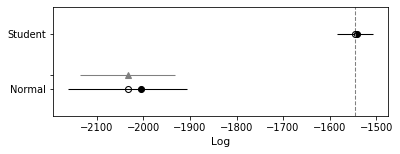

In [17]:
az.plot_compare(comparison_loo)

<AxesSubplot:xlabel='Log'>

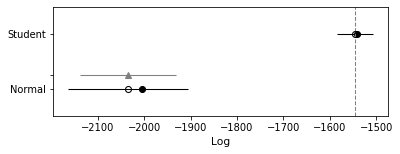

In [18]:
az.plot_compare(comparison_waic)

Above plots suggest that Student model is better 

### Excercise 3 - compare models with different numbers of predictors

In [19]:
model_5 =CmdStanModel(stan_file='code_5.stan')

INFO:cmdstanpy:compiling stan file /home/lab6/code_5.stan to exe file /home/lab6/code_5
INFO:cmdstanpy:compiled model executable: /home/lab6/code_5


In [36]:
X_1 = np.array([sim_2[f"X[{i+1},1]"] for i in range(N)])
X_ = np.array([sim_2[f"X[{i+1},2]"] for i in range(N)])
X_2 = np.concatenate((X_1, X_), axis=0)
X_ = np.array([sim_2[f"X[{i+1},3]"] for i in range(N)])
X_3 = np.concatenate((X_2, X_), axis =0)

In [28]:
sim_5_1_ = model_5.sample(data={"N": N, "y": y_array_1[:,0], "K": 1, "X": X_1[:,0].reshape(N,1) })
sim_5_1 = sim_5_1_.draws_pd()

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)




chain 1 |████████▋ | 00:00 Iteration: 1600 / 2000 [ 80%]  (Sampling)



chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [35]:
sim_5_2_ = model_5.sample(data={"N": N, "y": y_array_1[:,0], "K": 2, "X": X_2[:,0].reshape(N,2) })
sim_5_2 = sim_5_2_.draws_pd()

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)





chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [46]:
sim_5_3_ = model_5.sample(data={"N": N, "y": y_array_1[:,0], "K": 3, "X": X_3[:,0].reshape(N,3) })
sim_5_3 = sim_5_3_.draws_pd()

ValueError: cannot reshape array of size 12000000 into shape (1000,3)

#### Compare 

In [38]:
#Loo
comparison_loo2 = az.compare(
    {"K:1": az.from_cmdstanpy(sim_5_1_), "K:2": az.from_cmdstanpy(sim_5_2_), "K:3": az.from_cmdstanpy(sim_5_3_)},
    ic="loo")
comparison_loo2

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated sh

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
K:2,0,-2037.366159,31.861382,0.000000,7.270107e-01,129.804201,0.000000,True,log
K:1,1,-2037.809555,29.899285,0.443396,2.585827e-17,129.641115,1.950793,True,log
K:3,2,-2038.757061,31.275256,1.390902,2.729893e-01,128.708338,2.869655,True,log


In [39]:
#Waic
comparison_waic2 = az.compare(
    {"K:1": az.from_cmdstanpy(sim_5_1_), "K:2": az.from_cmdstanpy(sim_5_2_), "K:3": az.from_cmdstanpy(sim_5_3_)},
    ic="loo")
comparison_waic2

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated sh

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
K:2,0,-2037.366159,31.861382,0.000000,7.270107e-01,129.804201,0.000000,True,log
K:1,1,-2037.809555,29.899285,0.443396,2.585827e-17,129.641115,1.950793,True,log
K:3,2,-2038.757061,31.275256,1.390902,2.729893e-01,128.708338,2.869655,True,log


<AxesSubplot:xlabel='Log'>

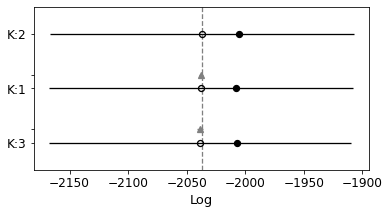

In [40]:
az.plot_compare(comparison_waic2)

<AxesSubplot:xlabel='Log'>

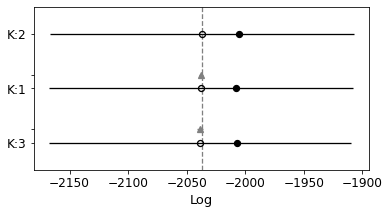

In [41]:
az.plot_compare(comparison_loo2)